<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_Deutsch'sAlgorithm_00_Copilot_mkbahk_20250331.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=04ecd3ea4b7403f54224c55b54331a06832cbcaef48f140a21f82633385bab35
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.5 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-3svp29r1
  Running comman

In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

In [14]:
# 함수가 상수함수 이면 아무것도 하지 않음
# 함수가 균형함수 이면 입력 큐비트의 q0의 위상을 바꾸는 연산

# Deutsch's Oracle for f(x) = x (Balanced Function, 균형함수임)
#def deutsch_oracle(qc, q1, q2):
#    qc.cx(q1, q2)  # CNOT gate
###def

# 상수함수는 추가작업이 없는 경우로 설계
def deutsch_oracle(qc, q1, q2):
  return
###def

In [15]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Initialize the second qubit (auxiliary qubit) to |1>
qc.reset(0) #입력값 역할
qc.x(1) #보조 큐비트로, 함수 평가 결과를 저장
qc.barrier()

# Apply Hadamard gates to both qubits
qc.h(0)
qc.h(1)

# Add the oracle
qc.barrier()
deutsch_oracle(qc, 0, 1)
qc.barrier()

# Apply Hadamard gate to the first qubit again
qc.h(0)

# Measure the first qubit
qc.measure(0, 0)


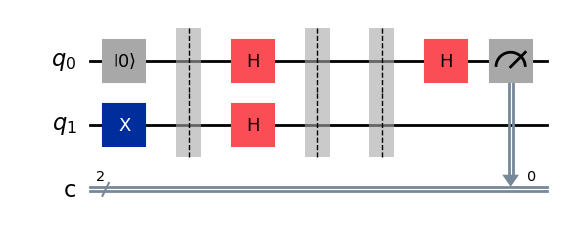

In [16]:
qc.draw("mpl")

Result: {'00': 1024}


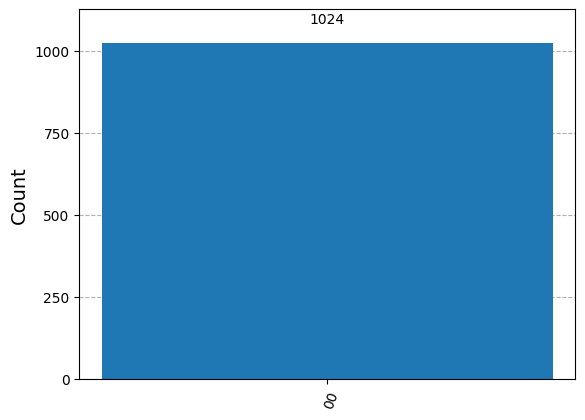

In [17]:
# Use Aer's qasm_simulator to simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots=1024).result()

# Get the counts and visualize the results
counts = result.get_counts(qc)
print("Result:", counts)
plot_histogram(counts)

# 결과해석: 첫 번째 큐비트 q0를 측정하여 |0> 이면 상수 함수, |1>이면 균형함수